
# Анализ данных опросов stack overflow

Исследование данных с 2020 по 2024 на предмет выявления трендов в обучении групп специалистов и разницы между доходами специалистов с различными способами обучения.

Для изучения были выделены 2 группы - все участники и специалисты по работе с данными
Также, я сравню категорию data scientists с остальными дата специалистами.

Исходные данные доступны по ссылке https://survey.stackoverflow.co/. Также, данные прикреплены в папке проекта с незначительным изменением названий файлов с целью указать год.
Данные с 2020 по 2021 год включали другую методологию опроса и поэтому будут использоваться только при изучении агрегированных данных по годам без разделения на группы по обучению.

Описание данных:
- ResponseId	- номер ответа участника
- LearnCode	- данные о предпочитаемых способах обучения
- LearnCodeOnline	- данные о предпочитаемых способах онлайн обучения
- YearsCode - сколько лет респондент программирует, с учетом учебы
- YearsCodePro - сколько лет респондент программирует, без учета учебы
- WorkExp - сколько лет респондент работает по профилю
- Country - страна происхождения
- ConvertedCompYearly - заявленный респондентом годовой доход в долларах
- Programming ProExperience - YearsCodePro поделенный на интервалы
- LearnerType - LearnCode и LearnCodeOnline с выделением типов обучения

## Этапы выполнения проекта
### [1. Формулировка задачи](#1)
### [2. Предобработка данных](#2)
### [3. Исследовательский анализ данных](#3)
### [3.1. Распространенность способов обучения](#3.1)
### [3.2. Распределение доходов](#3.2)
### [3.3. Изучение динамики доходов](#3.3)
### [4. Результаты](#results)

<a id='1'></a>
# 1. Формулировка задачи

Выяснить как учились действующие специалисты по анализу данных в начале карьеры, как это влияло на их карьеры и имеются ли отличия от генеральной совокупности.

Гипотеза - начинающие специалисты перестают учиться "самостоятельно" и либо получают специализированное образование либо заканчивают курсы, как и в целом в мире, а также имеют большие доходы чем обучавшиеся самостоятельно.


In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [270]:
df = pd.read_csv('survey_results_public.csv')

schema = pd.read_csv('survey_results_schema.csv')

In [271]:
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 30)

<a id='2'></a>
# 2. Предобработка данных

Посмотрим на нули, пропуски, выделим группы. Ответим на интересуюдщие вопросы
Какие специалисты представлены? 
Можем ли мы изучить интересующую группу: специалистов по анализу данных из России? 

In [273]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,...,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,37,27,Developer Experience,NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,C#,C#,C#,Firebase 

In [274]:
with pd.option_context("display.max_rows", None): display(schema)

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR
5,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR
6,QID25,EdLevel,Which of the following best describes the high...,True,MC,SAVR
7,QID276,LearnCode,How do you learn to code? Select all that apply.,False,MC,MAVR
8,QID281,LearnCodeOnline,What online resources do you use to learn to c...,False,MC,MAVR
9,QID331,TechDoc,What is the source of the technical documentat...,False,MC,MAVR


Что взять за опыт программирования?

Согласно pdf, колонка YearsCode - сколько лет человек программирует - включает обучение. 

Впоследствии, я планирую разбить данные по способам обучения, поэтому в качестве опыта возьму что-то другое тк не стоит задваивать обучение в качестве объяснительной переменной.

колонка YearsCodePro не включает образование - получается сколько лет человек пишет код профессионально. 
колонка WorkExp - опыт работы - может быть меньше чем YearsCodePro если человек перестал писать код? Посмотрим на графике позже.



In [276]:
df.columns.values 


array(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'Check', 'CodingActivities', 'EdLevel', 'LearnCode',
       'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro',
       'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'LanguageAdmired', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'DatabaseAdmired',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'PlatformAdmired', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'WebframeAdmired',
       'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith',
       'EmbeddedAdmired', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'MiscTechAdmired',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmir

In [277]:
df.dtypes.head(15), df.dtypes.tail(10)#цифровые значения имеют адекватные типы данных. Видимо, Age разбит на интервалы

(ResponseId           int64
 MainBranch          object
 Age                 object
 Employment          object
 RemoteWork          object
 Check               object
 CodingActivities    object
 EdLevel             object
 LearnCode           object
 LearnCodeOnline     object
 TechDoc             object
 YearsCode           object
 YearsCodePro        object
 DevType             object
 OrgSize             object
 dtype: object,
 JobSatPoints_6         float64
 JobSatPoints_7         float64
 JobSatPoints_8         float64
 JobSatPoints_9         float64
 JobSatPoints_10        float64
 JobSatPoints_11        float64
 SurveyLength            object
 SurveyEase              object
 ConvertedCompYearly    float64
 JobSat                 float64
 dtype: object)

In [278]:
df['YearsCodePro'].unique() #нужно заменить данные для конвертации

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [279]:

df['YearsCodePro'] = df['YearsCodePro'].replace(to_replace = ['More than 50 years', 'Less than 1 year'], value = [50, 0])
df['YearsCodePro'] = df['YearsCodePro'].astype('float')


<Axes: xlabel='WorkExp', ylabel='YearsCodePro'>

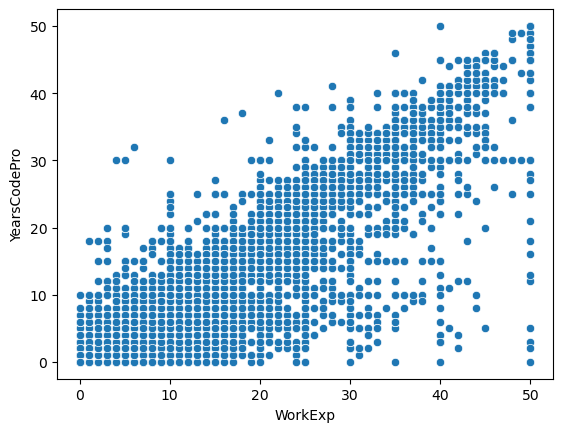

In [280]:
#сравним переменные для выбора "опыт программирования"

df[['WorkExp','YearsCodePro']].corr()
sns.scatterplot(data=df, x = 'WorkExp', y ='YearsCodePro')
#похоже что меньшинство кодило вначале,а потом перестало и накпливало опыт без кода.
#довольно многие накапливали опыт профессионального написания кода не на работе? 

In [281]:
#Пока что я буду использовать колонку YearsCodePro в качестве такового опыта понимая её как 
#"сколько лет специалист пишет код на профессиональном уровне" тк это время также влияет на качество работы.

df['Programming ProExperience'] = pd.cut(df['YearsCodePro'], bins = [0,1,3,5,10,25,50]) #kinda HeadHunter inspired
df['Programming ProExperience'].value_counts()

df['WorkExperienceBracket'] =  pd.cut(df['WorkExp'], bins = [0,1,3,5,10,25,50]) 

In [282]:
df.shape #всего у нас 65 437 ответов

(65437, 116)

In [283]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 116 entries, ResponseId to WorkExperienceBracket
dtypes: category(2), float64(14), int64(1), object(99)
memory usage: 57.0+ MB


In [284]:

df.dropna(axis = 0, how = 'all').shape == df.shape, df.dropna(axis = 1, how = 'all').shape == df.shape
#осталось то же значение строк и колонок --> нет полностью пустых строк и колонок


(True, True)

In [285]:
df.describe().round(2)

,ResponseId,YearsCodePro,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.00,51610.00,3.374000e+04,29658.00,29324.00,29393.00,29411.00,29450.00,29448.00,29456.00,29456.00,29450.00,29445.00,23435.00,29126.00
mean,32719.00,10.18,2.963841e+145,11.47,18.58,7.52,10.06,24.34,22.97,20.28,16.17,10.96,9.95,86155.29,6.94
std,18890.18,9.11,5.444117e+147,9.17,25.97,18.42,21.83,27.09,27.02,26.11,24.85,22.91,21.78,186756.97,2.09
min,1.00,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,16360.00,3.00,6.000000e+04,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,32712.00,6.00
50%,32719.00,7.00,1.100000e+05,9.00,10.00,0.00,0.00,20.00,15.00,10.00,5.00,0.00,0.00,65000.00,7.00
75%,49078.00,15.00,2.500000e+05,16.00,22.00,5.00,10.00,30.00,30.00,25.00,20.00,10.00,10.00,107971.50,8.00
max,65437.00,50.00,1.000000e+150,50.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,16256603.00,10.00



Уберем данные с которыми не будем работать. 
Оставляю нужное для определения специальности, подсчета опыта, образования, способа обучения, зарплаты


In [287]:
df = df.drop(columns = ['MainBranch', 'Employment', 'RemoteWork',
       'Check', 'CodingActivities',  'TechDoc', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'BuildvsBuy', 'TechEndorse', 'Currency',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'PlatformAdmired', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'WebframeAdmired',
       'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith',
       'EmbeddedAdmired', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'MiscTechAdmired',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired',
       'OpSysPersonal use', 'OpSysProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired',
       'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith',
       'AISearchDevAdmired', 'NEWSOSites', 'SOVisitFreq', 'SOAccount',
       'SOPartFreq', 'SOHow', 'SOComm', 'AISelect', 'AISent', 'AIBen',
       'AIAcc', 'AIComplex', 'AIToolCurrently Using',
       'AIToolInterested in Using', 'AIToolNot interested in Using',
       'AINextMuch more integrated', 'AINextNo change',
       'AINextMore integrated', 'AINextLess integrated',
       'AINextMuch less integrated', 'AIThreat', 'AIEthics',
       'AIChallenges', 'TBranch', 'ICorPM', 'Knowledge_1',
       'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5',
       'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9',
       'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching',
       'TimeAnswering', 'Frustration', 'ProfessionalTech',
       'ProfessionalCloud', 'ProfessionalQuestion', 'Industry'], axis = 1)


In [288]:
df.columns.unique()

Index(['ResponseId', 'Age', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'YearsCode', 'YearsCodePro', 'DevType', 'Country', 'CompTotal',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired',
       'WorkExp', 'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5',
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat', 'Programming ProExperience',
       'WorkExperienceBracket'],
      dtype='object')

In [290]:
#mising values

total_nan = df.isnull().sum().sort_values(ascending = False)
percent_nan = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)

missing_df  = pd.concat([total_nan, percent_nan], axis=1, keys=['Total', 'Percent'])
missing_df 

,Total,Percent
ConvertedCompYearly,42002,64.186928
JobSat,36311,55.490013
JobSatPoints_1,36113,55.187432
JobSatPoints_4,36044,55.081987
JobSatPoints_5,36026,55.054480
...,...,...
YearsCode,5568,8.508948
LearnCode,4949,7.563000
EdLevel,4653,7.110656
Age,0,0.000000


In [291]:
df['DevType'].unique()
#посмотрел какие типы специалистов участвовали

array([nan, 'Developer, full-stack', 'Developer Experience', 'Student',
       'Academic researcher', 'Project manager', 'Developer Advocate',
       'Developer, back-end', 'Other (please specify):',
       'Developer, front-end', 'Database administrator',
       'Developer, desktop or enterprise applications',
       'Cloud infrastructure engineer',
       'Data scientist or machine learning specialist',
       'Research & Development role',
       'Developer, embedded applications or devices',
       'System administrator', 'DevOps specialist', 'Engineering manager',
       'Designer', 'Security professional',
       'Senior Executive (C-Suite, VP, etc.)', 'Developer, mobile',
       'Developer, game or graphics', 'Data or business analyst',
       'Educator', 'Developer, QA or test', 'Product manager',
       'Developer, AI', 'Scientist', 'Engineer, site reliability',
       'Blockchain', 'Marketing or sales professional',
       'Hardware Engineer', 'Data engineer'], dtype=object)

In [292]:
#выделил специалистов связанных с данными
data_spec = df[df['DevType'].isin(['Data or business analyst', 
                             'Data scientist or machine learning specialist',
                             'Data engineer', 'Database administrator'])]
#наверное стоит включить еще специалистов но кто такой Developer, AI - не очень понятно

data_spec.groupby('DevType').agg({'DevType': 'count'})
#we count number of data related specialists participated in survey.

print(data_spec.groupby('DevType').agg({'DevType': 'count'}))

print('total number of data related specialists is =    ', data_spec['ResponseId'].count())
#2.8 k total number of data related specialists не больше 5% от общего числа участников

                                               DevType
DevType                                               
Data engineer                                     1118
Data or business analyst                           523
Data scientist or machine learning specialist     1024
Database administrator                             171
total number of data related specialists is =     2836


In [293]:
df['data_specialist'] = df['DevType'].isin(['Data or business analyst', 
                             'Data scientist or machine learning specialist',
                             'Data engineer', 'Database administrator'])

#Впоследствии мы сделаем столбец-флаг для фильтрации data_specialists в основном df для вывода результатов на дашборд, но в этом файле продолжим использовать data_spec 

df['ResponseId'][df['data_specialist'] == True].count() == data_spec['DevType'].count().sum() 

#проверим правильно ли работает новый df

True

In [294]:
data_spec['DevType'].count().sum() #2836 data specialists. Много ли это?

2836

In [295]:
data_spec_percentage = data_spec.groupby('DevType').agg({'DevType': 'count'}).sum()/len(df)*100 
data_spec_percentage 
#  4.3% участвовавших в исследовании являются дата специалистами. сравним это с "отказниками" - не назвавшими роль

DevType    4.33394
dtype: float64

In [296]:
print('participants not stating their role in DevType col')
df['role_not_stated'] = df['DevType'].isnull()
missing_df.loc['DevType']
#9% of participants didnt include their role. 

participants not stating their role in DevType col


Total      5992.000000
Percent       9.156899
Name: DevType, dtype: float64

In [297]:
no_value_percentage = df['DevType'].isnull().sum() * 100 / len(df) 
no_value_percentage > 2* data_spec_percentage
print('Доля отказников в 2 раза больше чем доля специалистов по работе с данными', round(no_value_percentage, 2), 'vs', round(data_spec_percentage, 2), 'выражено в %')
#доля отказников в два раза больше чем доля специалистов по работе с данными. 
#было бы славно поискать еще датасеты, но мы продолжим

Доля отказников в 2 раза больше чем доля специалистов по работе с данными 9.16 vs DevType    4.33
dtype: float64 выражено в %


<a id='3'></a>
# 3. Исследовательский анализ данных

Надеялся изучить аналитиков данных из России. 
Увы придется работать с широкой группой data specialists без выделения стран


In [299]:
data_spec.groupby('Country').agg({'Country':'count'}).loc['Russian Federation'] 
#всего 38 дата специалистов из России участвовало в опросе. меньше 0.1 % от общих данных и слишком мало для выделения репрезентативных групп по опыту и способу обучения
#Придется использовать мировые данные 

Country    38
Name: Russian Federation, dtype: int64

In [300]:
top_dev_countries = df["Country"].dropna().value_counts(normalize = True).head(5)*100
top_dev_countries #share by country


Country
United States of America                                18.827422
Germany                                                  8.394706
India                                                    7.179705
United Kingdom of Great Britain and Northern Ireland     5.470898
Ukraine                                                  4.534193
Name: proportion, dtype: float64

In [301]:
data_top_dev_countries = data_spec['Country'].dropna().value_counts(normalize = True).head(5)*100
data_top_dev_countries
#data specialists countries by share. Топы примерно совпадают

Country
United States of America                                22.613065
Germany                                                  7.430007
India                                                    6.927495
United Kingdom of Great Britain and Northern Ireland     6.101938
Ukraine                                                  4.379038
Name: proportion, dtype: float64

C:\Users\talek\AppData\Local\Temp\ipykernel_11640\1673302626.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_spec['Country'].replace({'United Kingdom of Great Britain and Northern Ireland': 'UK'}, inplace= True)
C:\Users\talek\AppData\Local\Temp\ipykernel_11640\1673302626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spec['

[Text(0.5, 1.0, 'Number of data specialists by top 5 countries, 2024'),
 Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Count')]

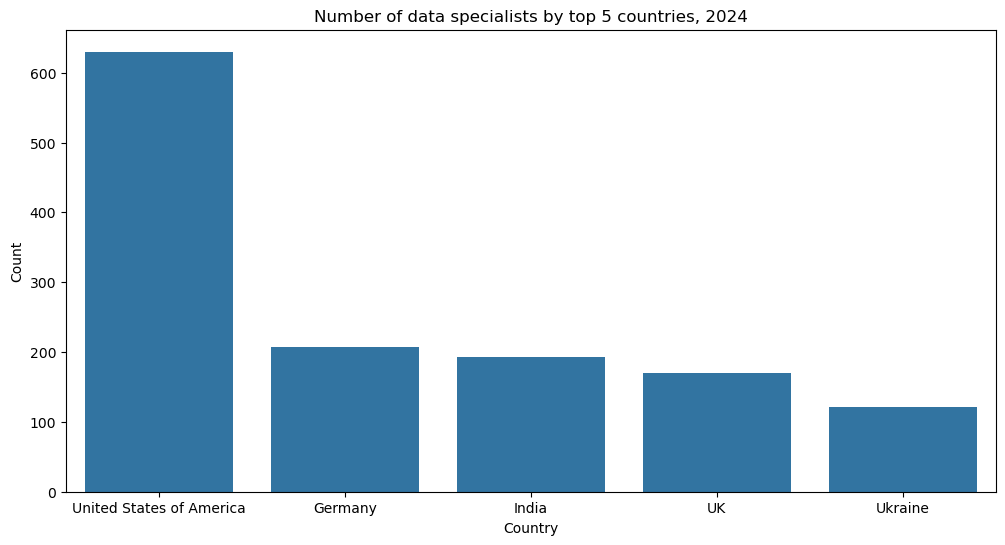

In [302]:

data_spec['Country'].replace({'United Kingdom of Great Britain and Northern Ireland': 'UK'}, inplace= True)

data_spec_by_countries = data_spec.groupby('Country').agg({'ResponseId': 'count'})

plt.figure(figsize= (12,6))
#probably countplot было бы достаточно
sns.barplot(data = data_spec_by_countries.nlargest(5, 'ResponseId'), x = 'Country', y = 'ResponseId', estimator = 'sum').\
        set(title = 'Number of data specialists by top 5 countries, 2024', xlabel='Country', ylabel='Count')

Вывод.
Увы, мы не можем изучать специалистов по работе с данными только из России тк в исследовании приняло участие слишком малое количество людей. 
Будем исследовать две группы - всех респондентов и всех дата специалистов.

<a id='3.1'></a>
# 3.1 Распространенность способов обучения

   Изучение распространенных способов обучения и разницы между группами по бэкграунду
   
   Меня интересовало разбиение на " получал соответствующее образование", "учился на длительных (платных) курсах" и "учился по бесплатным и/или небольшим платным курсам, искал информацию сам"

   начал с изучения колонок LearnCode - способ обучения, LearnCodeOnline - способ онлайн обучения. 

   После этого я выделил интересующие меня колонки, например 'school' (включающую college)  и понял, что отделить маленькие и курсы от онлайн школ не получится, пришлось разбить на 4 группы has_school и studied_courses и их пересечения (both) и отрицание (neither)
   

In [305]:
df['LearnCode'].nunique() #вариантов способов обучения много.

418

In [306]:

print(df['LearnCode'].count(), 'число ответивших на вопрос о способе обучения (не только онлайн)') 
#60 k 
print(df['LearnCodeOnline'].count(), 'число ответивших на вопрос об использовании онлайн обучения') 
#49 k
print(df.shape[0], 'всего респондентов 65 k --> пересекающиеся множества. Вспомним о 9% не ответивших и помним что ответивший на LCO также обязательно ответит на LC ')

60488 число ответивших на вопрос о способе обучения (не только онлайн)
49237 число ответивших на вопрос об использовании онлайн обучения
65437 всего респондентов 65 k --> пересекающиеся множества. Вспомним о 9% не ответивших и помним что ответивший на LCO также обязательно ответит на LC 


In [307]:
df = df.drop(df[df['LearnCode'].isnull()].index, axis = 0)
data_spec = data_spec.drop(data_spec[data_spec['LearnCode'].isnull()].index, axis = 0)
#уберем неуказавших способ обучения

In [308]:
#создал колонку с индикатором True если респондент написал что-то в LearnCode 

df['LearnCode_True'] = df['LearnCode'].apply(lambda x: True if (
pd.notnull(x)) else False)

#аналогично для Online 
df['LearnCodeOnline_True'] = df['LearnCodeOnline'].apply(lambda x: True if (
pd.notnull(x)) else False) 
#df['LearnCode_True']

#используем эти индикаторы попытавшись найти тех кто ответил на только Online колонку.

In [309]:
Online_only = df[(df['LearnCode_True'] == False) & (df['LearnCodeOnline_True'] == True)].shape[0]

Online_only # 0
#если человек заполнял колонку LearnCodeOnline то LearnCode тоже была заполнена. 


#Проверим это еще одним способом - взяв обе за True и сравнив с известным числом обучающихся онлайн

0

In [310]:
Both_ways_True = df[(df['LearnCode_True'] == True) & (df['LearnCodeOnline_True'] == True)].shape[0]
Both_ways_True == df['LearnCodeOnline'].count()
#значит все верно: LearnCodeOnline == True --> LearnCode == True

True

In [311]:
df['LearnCode'].unique()[:10]
#можно встретить other online resources что означает что LearnCode также включает онлайн формат

array(['Books / Physical media',
       'Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum, online community)',
       'Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc)',
       'Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc);Online Courses or Certification',
       'Other online resources (e.g., videos, blogs, forum, online community)',
       'School (i.e., University, College, etc);Online Courses or Certification',
       'Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification;Coding Bootcamp',
       'Books / Physical media;Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification',
       'On the job training;Other online resources (e.g., videos, blogs, forum, onli

In [312]:
pd.Series(df['LearnCode'].unique()).str.split(';')[:10]


#в 6 строке School (i.e., University, College, etc) 
#является подходящим вариантом для отфильтровывания по образованию

#Также тут встречаются - Online Courses or Certification и Coding Bootcamp --> в колонке включено слишком многое. 
#Нужно посмотреть дифференциацию в онлайне, но сначала разберемся со School


0                             [Books / Physical media]
1    [Books / Physical media, Colleague, On the job...
2    [Books / Physical media, Colleague, On the job...
3    [Other online resources (e.g., videos, blogs, ...
4    [Other online resources (e.g., videos, blogs, ...
5    [School (i.e., University, College, etc), Onli...
6    [Other online resources (e.g., videos, blogs, ...
7    [Books / Physical media, Other online resource...
8    [On the job training, Other online resources (...
9    [Books / Physical media, Other online resource...
dtype: object

In [313]:
college_learned = df.loc[df['LearnCode'].
str.contains('School (i.e., University, College, etc)', regex=False, na=False)]

college_learned['ResponseId'].count() 
#число научившихся программировать во время получения образования в университете


29722

In [314]:
#посмотрим на  онлайн курсы с сертификатами и буткемпы
df['ResponseId'].loc[df['LearnCode'].
str.contains('Online Courses or Certification', regex=False, na=False)].count() #30 k но тут и курсы и курсы с сертификатами - неоч

df['ResponseId'].loc[df['LearnCode'].
str.contains('Coding Bootcamp', regex=False, na=False)].count() #6,5 k

'30 k прошедших (предположительно) длительные курсы с сертификатами и 6,5 к буткемпы'

'30 k прошедших (предположительно) длительные курсы с сертификатами и 6,5 к буткемпы'

In [315]:
set(df['LearnCodeOnline'].unique())
#Certification videos также похожи на длительные курсы от школ 

{'Technical documentation;Blogs;Coding sessions (live or recorded);Interactive tutorial;AI',
 'Technical documentation;Written Tutorials;Stack Overflow;Social Media;Interactive tutorial;Video-based Online Courses;Written-based Online Courses;AI;Certification videos;Online challenges (e.g., daily or weekly coding challenges)',
 'Technical documentation;Blogs;Written Tutorials;Coding sessions (live or recorded);Social Media;How-to videos;Video-based Online Courses;Written-based Online Courses',
 'Technical documentation;Books;Written Tutorials;Stack Overflow;Interactive tutorial;Written-based Online Courses;Other (Please specify):',
 'Technical documentation;Blogs;Written Tutorials;Written-based Online Courses;Online challenges (e.g., daily or weekly coding challenges)',
 'Technical documentation;Written Tutorials;Stack Overflow;Coding sessions (live or recorded);How-to videos;Interactive tutorial;Written-based Online Courses;Certification videos;Programming Games;Auditory material (e.g.

In [316]:
'сделаю True/False флаги для фильтраций для основного df и для data_spec'

'сделаю True/False флаги для фильтраций для основного df и для data_spec'

In [317]:
df['LearnCode'].value_counts()

LearnCode
Other online resources (e.g., videos, blogs, forum, online community)                                                                                                 3674
Books / Physical media;Other online resources (e.g., videos, blogs, forum, online community)                                                                          2493
Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc)                                                         2362
Books / Physical media;Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification                                          2286
Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification                                                                 2182
                                                                                                                                       

In [318]:
#флаг для университета/ колледжа
df['has_school'] = df['LearnCode'].str.contains("School (i.e., University, College, etc)", regex=False, na=False)

data_spec['has_school'] = data_spec['LearnCode'].str.contains("School (i.e., University, College, etc)", regex=False, na=False)


In [319]:
#То же самое для курсов

df['studied_courses'] = ((df['LearnCodeOnline'].str.contains('Written-based Online Courses', regex=False, na=False)) |\
               (df['LearnCodeOnline'].str.contains('Video-based Online Courses', regex=False, na=False)) |\
               (df['LearnCodeOnline'].str.contains('Certification videos', regex=False, na=False)))
df['studied_courses']

data_spec['studied_courses'] = (data_spec['LearnCodeOnline'].str.contains('Written-based Online Courses', regex=False, na=False)) |\
               (data_spec['LearnCodeOnline'].str.contains('Video-based Online Courses', regex=False, na=False)) |\
               (data_spec['LearnCodeOnline'].str.contains('Certification videos', regex=False, na=False))


In [320]:
#объединим информацию из индикаторов - так будет нагляднее. и посчитаем группы а затем соберем данные в хэтмэп


def learntype(has_school, studied_courses):    
    if has_school is True and studied_courses is True:
        return 'университет и курсы' #в старых версиях было both
    elif has_school is False and studied_courses is True:
        return 'только курсы' #'studied at courses'
    elif has_school is True and studied_courses is False:
        return 'только университет' #studied at college
    else:
        return 'самостоятельный' #neither
        
df['LearnerType'] = np.vectorize(learntype)(df['has_school'], df['studied_courses']) 

data_spec['LearnerType'] = np.vectorize(learntype)(data_spec['has_school'], data_spec['studied_courses']) 

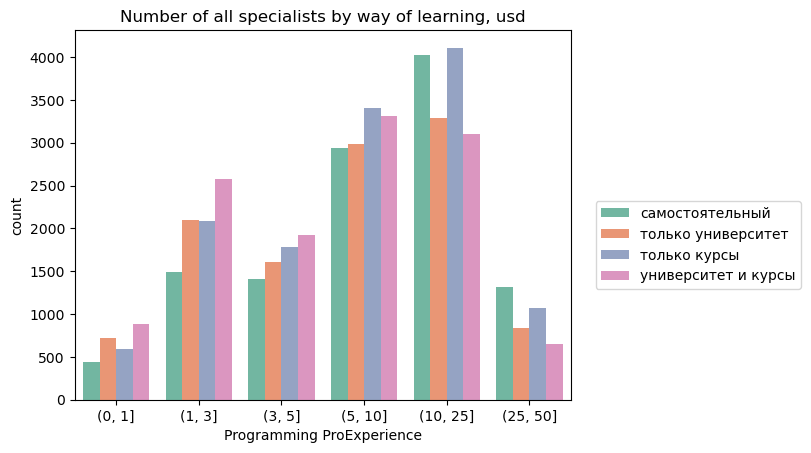

In [321]:
sns.countplot(data = df, x = 'Programming ProExperience',  palette ='Set2', hue = 'LearnerType').set_title('Number of all specialists by way of learning, usd')
plt.legend(loc=(1.05,0.3))

In [322]:
print('проверим распределение для всех специалистов имеющих опыт работы до 5 лет%\n', df[df['YearsCodePro'] <5].groupby(['has_school', 'studied_courses']).count()['ResponseId']/df[df['YearsCodePro'] <5].shape[0]*100)

проверим распределение для всех специалистов имеющих опыт работы до 5 лет%
 has_school  studied_courses
False       False              17.954465
            True               24.041524
True        False              26.212103
            True               31.791908
Name: ResponseId, dtype: float64


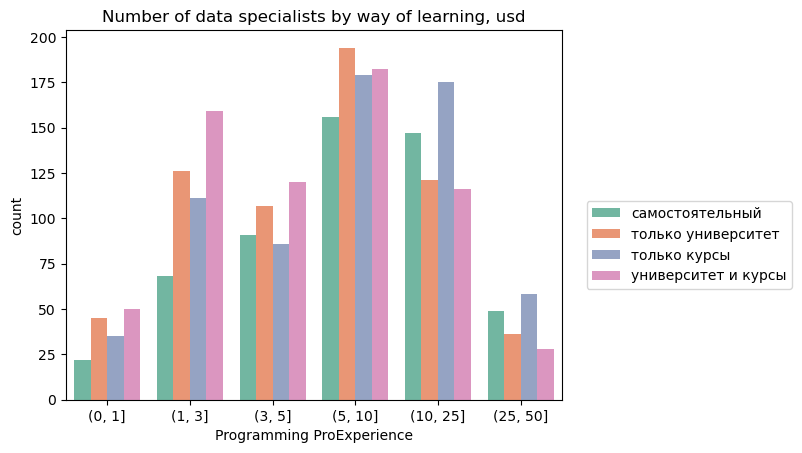

In [323]:
sns.countplot(data = data_spec, x = 'Programming ProExperience',  palette ='Set2', hue = 'LearnerType').set_title('Number of data specialists by way of learning, usd')
plt.legend(loc=(1.05,0.3))

In [324]:
print('проверим для дата специалистов имеющих опыт работы до 5 лет%\n', data_spec[data_spec['YearsCodePro'] <=5].groupby(['has_school', 'studied_courses']).count()['ResponseId']/data_spec[data_spec['YearsCodePro'] <=5].shape[0]*100)

проверим для дата специалистов имеющих опыт работы до 5 лет%
 has_school  studied_courses
False       False              17.292576
            True               22.532751
True        False              27.248908
            True               32.925764
Name: ResponseId, dtype: float64


<Axes: ylabel='LearnerType'>

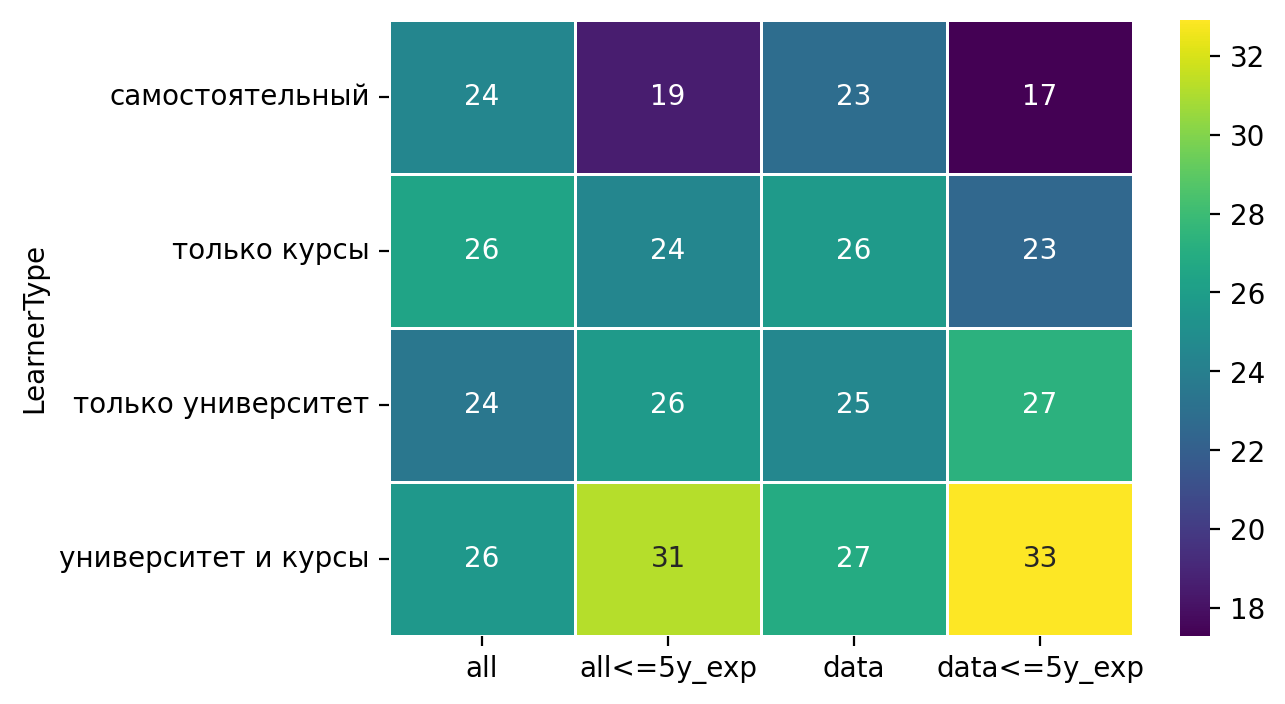

In [325]:
#соберем эти данные в хитмэп - удобнее чем смотреть на таблички. Тк данные пересекаются могут быть 
heat_map_compare = pd.DataFrame()

heat_map_compare['all'] = df.groupby(['LearnerType']).count()['ResponseId']/df.groupby(['LearnerType']).count()['ResponseId'].sum()*100
heat_map_compare['all<=5y_exp'] = df[df['YearsCodePro'] <=5].groupby(['LearnerType']).count()['ResponseId']/df[df['YearsCodePro'] <=5].count()['ResponseId'].sum()*100
heat_map_compare['data'] = data_spec.groupby(['LearnerType']).count()['ResponseId']/data_spec.count()['ResponseId'].sum()*100
heat_map_compare['data<=5y_exp'] = data_spec[data_spec['YearsCodePro']<=5].groupby(['LearnerType']).count()['ResponseId']/data_spec[data_spec['YearsCodePro']<=5].count()['ResponseId'].sum()*100



plt.figure(figsize = (6,4),dpi = 200) 
sns.heatmap(data=heat_map_compare, linewidth = 0.5, annot = True, cmap = 'viridis')


Обе группы специалистов до 5 лет опыта чаще заканчивали университет и курсы чем их более опытные коллеги.

<a id='3.2'></a>
# 3.2 Распределение доходов по способам обучения и опыту работы

In [328]:
#создадим возрастные когорты для более гладкого анализа доходов и посмотрим их характеристику по доходам на графиках

df['YearsCodePro'] = df['YearsCode'].replace(to_replace = ['More than 50 years', 'Less than 1 year'], value = [50, 0])

df['YearsCodePro'] = df['YearsCodePro'].astype('float').sort_values()

df['Programming ProExperience'] = pd.cut(df['YearsCodePro'], bins = [0,1,3,5,10,25,50]) #kinda hh inspired



data_spec['YearsCodePro'] = data_spec['YearsCodePro'].replace(to_replace = ['More than 50 years', 'Less than 1 year'], value = [50, 0])
data_spec['YearsCodePro'] = data_spec['YearsCodePro'].astype('float').sort_values()

data_spec['Programming ProExperience'] = pd.cut(data_spec['YearsCodePro'].astype('float'), bins = [0,1,3,5,10,25,50])  #kinda hh inspired


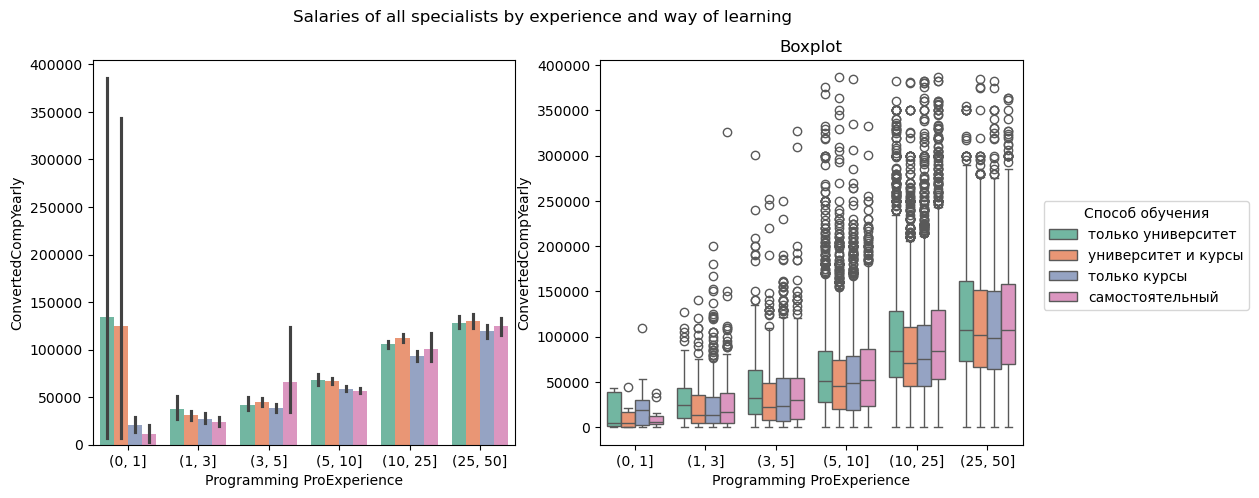

In [329]:
#Изучим распределение доходов всех специалистов. 
#Выбросы настолько сильны, что боксплот пришлось ограничить 99 процентилем.

figure, axes = plt.subplots(1, 2, sharex=True, figsize=(12, 5))
figure.suptitle('Salaries of all specialists by experience and way of learning')
ax=axes[0]
sns.barplot(data =df,x = 'Programming ProExperience', y = 'ConvertedCompYearly', hue='LearnerType', palette = 'Set2', ax=axes[0], legend = False)
sns.boxplot(data = df[(df['ConvertedCompYearly'] <= df['ConvertedCompYearly'].quantile(0.99))], x = 'Programming ProExperience', y = 'ConvertedCompYearly', hue = 'LearnerType', palette = 'Set2', ax=axes[1])
axes[1].set_title('Boxplot')

# сохраним порядок цветов и добавим легенду сбоку
hands, labs = axes[1].get_legend_handles_labels()
plt.legend(loc=(1.05,0.35), title= "Способ обучения")



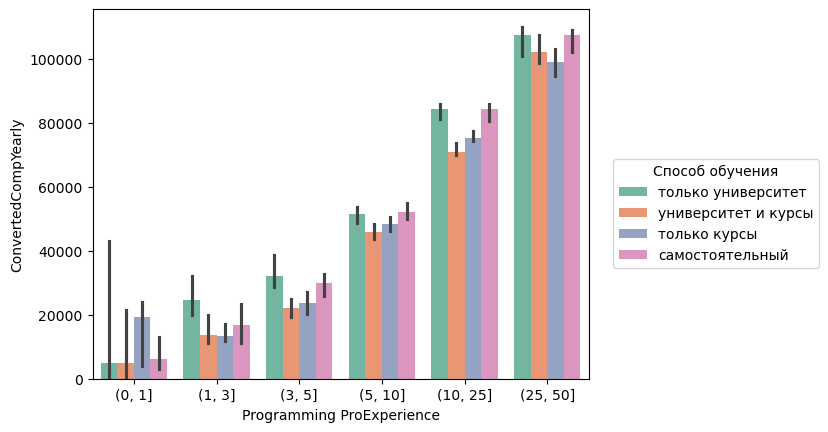

In [330]:
# построим медиану вместо простого среднего и уберем верхний 1%
sns.barplot(data = df[(df['ConvertedCompYearly'] <= df['ConvertedCompYearly'].quantile(0.99))], x = 'Programming ProExperience', y = 'ConvertedCompYearly', 
            estimator = np.median, errorbar='ci', hue = 'LearnerType', palette = 'Set2')
plt.legend(loc=(1.05,0.3), title= "Способ обучения")


  Заметны слишком большие выбросы, часть из которых стоит убрать полностью:
- не указавшие свой опыт и написавшие большие зарплаты представляют мало информации для наших целей.
- стоит убрать топ-менеджмеров тк их навыки программирования не всегда имеют отношение к зарплате - в начале блокнота можно посмотреть график -множество точек с большим WorkExp и малым YearsCodePro.
- возможно стоит убрать слишком нерепрезентативные доходы - доходы домохозяйств от 460 до 631 k usd представляют собой 98 и 99 процентили соответственно в США ист: https://statisticalatlas.com/United-States/Household-Income0

In [332]:
'уберем топ менеджмент и крупных outliers среди людей без указанного опыта и в целом слишком большие выбросы'
' так же уберем тех кто не указал зарплату'
no_relevance = df[(df['YearsCodePro'] <= 1) & (df['ConvertedCompYearly'] > 40000) |
(df['DevType'].str.contains('Senior Executive (C-Suite, VP, etc.)', regex=False, na=False)) |
#(df['ConvertedCompYearly'] > 500000) |
(df['ConvertedCompYearly'] == 0)]

df['Income'] = df['ConvertedCompYearly'].drop(no_relevance.index, axis=0) #yearly income in usd without irrelevant datapoints

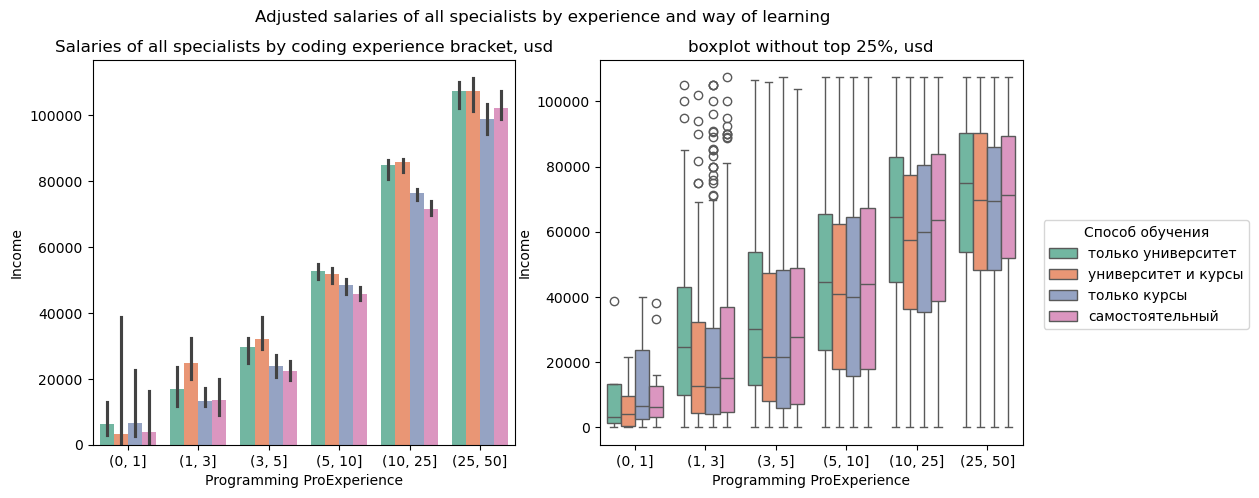

In [333]:
#Посмотрим на полные данные, чуть ограничив выбросы для наглядности боксплота
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(12, 5))
figure.suptitle('Adjusted salaries of all specialists by experience and way of learning')

sns.barplot(data =df,x = 'Programming ProExperience', y = 'Income', hue='LearnerType', palette = 'Set2', legend = False, ax=axes[0], estimator = 'median')\
        .set_title('Salaries of all specialists by coding experience bracket, usd')

sns.boxplot(data =df[(df['Income'] <= df['Income'].quantile(0.75))],x = 'Programming ProExperience', y = 'Income', hue='LearnerType', palette = 'Set2', ax=axes[1])\
        .set_title('boxplot without top 25%, usd')
plt.legend(loc=(1.05,0.3), title= "Способ обучения")

In [334]:
table = df[['LearnerType','Income', 'Programming ProExperience']].groupby(['Programming ProExperience','LearnerType', ]).median()['Income']
table = pd.DataFrame(table.reset_index().groupby('Programming ProExperience').agg({'Income': ('min', 'max')})).reset_index()
table['% diff'] = table['Income','max']/table['Income','min']*100
table['diff'] = table['Income','max']-table['Income','min']
table #на будущее бы сделать колонку индикатор где была бы пара мин и макс. 


C:\Users\talek\AppData\Local\Temp\ipykernel_11640\4038580661.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = df[['LearnerType','Income', 'Programming ProExperience']].groupby(['Programming ProExperience','LearnerType', ]).median()['Income']
C:\Users\talek\AppData\Local\Temp\ipykernel_11640\4038580661.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = pd.DataFrame(table.reset_index().groupby('Programming ProExperience').agg({'Income': ('min', 'max')})).reset_index()


Programming ProExperience   Income                % diff     diff
                                 min       max                     
0                    (0, 1]   3224.0    6620.0  205.334988   3396.0
1                    (1, 3]  13302.0   24707.0  185.738987  11405.0
2                    (3, 5]  22421.0   32222.0  143.713483   9801.0
3                   (5, 10]  45797.0   52629.0  114.918008   6832.0
4                  (10, 25]  71659.5   85886.0  119.852916  14226.5
5                  (25, 50]  98814.0  107406.0  108.695124   8592.0

In [335]:
table = df[['LearnerType','Income', 'Programming ProExperience']].groupby(['Programming ProExperience','LearnerType']).median()['Income']
#на будущее  бы добавить колонку с рассчетом долей и разницы от макс. Подумать как через apply/vectorize?
table= pd.DataFrame(table)
table
table['rank'] = table.groupby('Programming ProExperience')['Income'].rank(method='dense', ascending=False)
table[table['rank'].isin([1,4])] #рез непр. имеет место задв. почему?


C:\Users\talek\AppData\Local\Temp\ipykernel_11640\1013400590.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = df[['LearnerType','Income', 'Programming ProExperience']].groupby(['Programming ProExperience','LearnerType']).median()['Income']
C:\Users\talek\AppData\Local\Temp\ipykernel_11640\1013400590.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table['rank'] = table.groupby('Programming ProExperience')['Income'].rank(method='dense', ascending=False)


Income  rank
Programming ProExperience LearnerType                        
(0, 1]                    только курсы           6620.0   1.0
                          только университет     3224.0   4.0
(1, 3]                    только курсы          13302.0   4.0
                          только университет    24707.0   1.0
(3, 5]                    только университет    32222.0   1.0
                          университет и курсы   22421.0   4.0
(5, 10]                   самостоятельный       52629.0   1.0
                          университет и курсы   45797.0   4.0
(10, 25]                  только университет    85886.0   1.0
                          университет и курсы   71659.5   4.0
(25, 50]                  самостоятельный      107406.0   1.0
                          только университет   107406.0   1.0

    Главная тенденция среди всех специалистов - опыт приводит к росту доходов. Ожидаемо)

    Вторая тенденция - менее яркая
    учившиеся программировать в университете и в университете и на курсах в среднем опережают другие группы по доходам при равном опыте
    
    30% получают от 100 k usd                                                       

Рассмотрим дата специалистов таким же образом

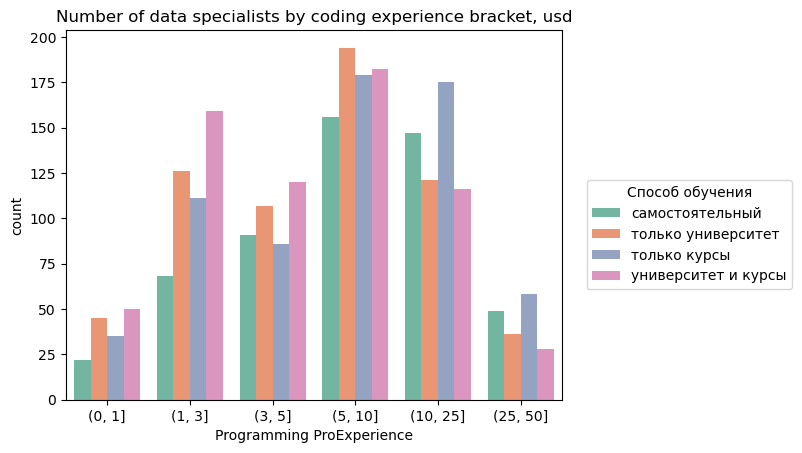

In [338]:
fig, ax = plt.subplots()

sns.countplot(data = data_spec, x = 'Programming ProExperience', palette ='Set2', hue = 'LearnerType').set_title('Number of data specialists by coding experience bracket, usd')
plt.legend(loc=(1.05,0.3), title= "Способ обучения")

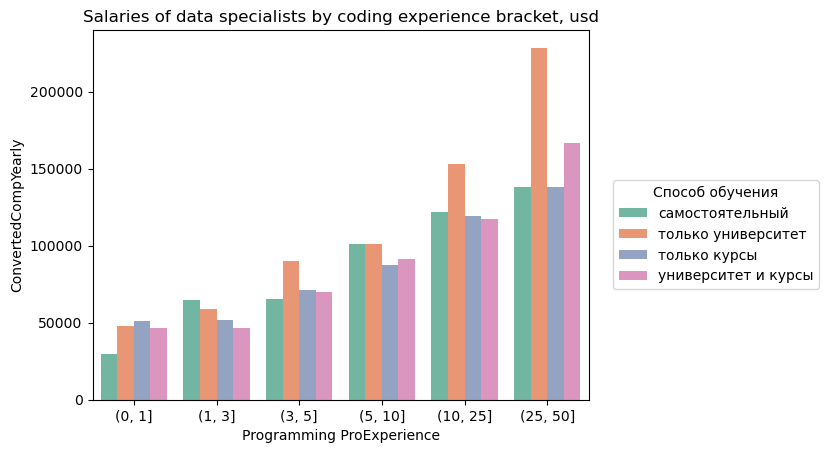

In [339]:
fig, ax = plt.subplots()

sns.barplot(data = data_spec, x = 'Programming ProExperience', y = 'ConvertedCompYearly', palette ='Set2', hue = 'LearnerType', estimator = 'mean', errorbar = None).set_title('Salaries of data specialists by coding experience bracket, usd')
plt.legend(loc=(1.05,0.3), title= "Способ обучения")
#ax.set_ylim(0,250000)


In [340]:
data_spec['Income'] = data_spec['ConvertedCompYearly'] #просто короче и удобнее

(0.0, 350000.0)

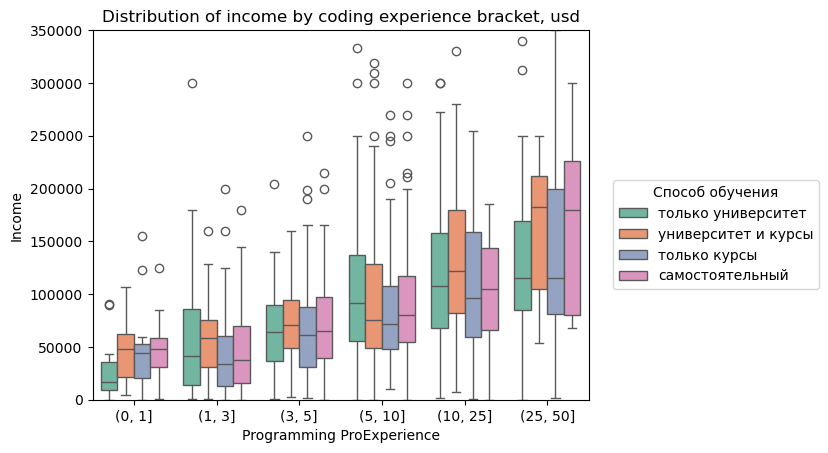

In [341]:
fig, ax = plt.subplots()
sns.boxplot(data =data_spec,x = 'Programming ProExperience', y = 'Income', hue='LearnerType', palette = 'Set2')\
        .set_title('Distribution of income by coding experience bracket, usd')
plt.legend(loc=(1.05,0.3), title= "Способ обучения", handles = hands, labels = labs)
ax.set_ylim(0,350000)

в группе самых опытных специалистов "самостоятельные" уходят в небольшой отрыв от двух других групп, незамеченный ранее.
Начинающие дата специалисты с опытом до года и способом обучения "только университет" имеют в среднем меньшие доходы чем сравнимые группы. 

Возможно, это оба факта объясняются малыми размерами выборок в крайних группах.

Также, может быть у нас просто слишком разные группы - аналитики отличаются ML специалистов и так далее.
Посмотрим на эти группы отдельно

In [343]:
table = data_spec[['LearnerType','Income', 'Programming ProExperience']].groupby(['Programming ProExperience','LearnerType', ]).mean()['Income']
table = pd.DataFrame(table.reset_index().groupby('Programming ProExperience').agg({'Income': ('min', 'max')})).reset_index()
table['% diff'] = table['Income','max']/table['Income','min']*100
table['diff'] = table['Income','max']-table['Income','min']
table


C:\Users\talek\AppData\Local\Temp\ipykernel_11640\3674662174.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = data_spec[['LearnerType','Income', 'Programming ProExperience']].groupby(['Programming ProExperience','LearnerType', ]).mean()['Income']
C:\Users\talek\AppData\Local\Temp\ipykernel_11640\3674662174.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = pd.DataFrame(table.reset_index().groupby('Programming ProExperience').agg({'Income': ('min', 'max')})).reset_index()


Programming ProExperience         Income                     % diff  \
                                       min            max               
0                    (0, 1]   29466.454545   50850.272727  172.570041   
1                    (1, 3]   46615.858974   64934.954545  139.297990   
2                    (3, 5]   65461.866667   89908.848485  137.345378   
3                   (5, 10]   87272.079545  101362.951807  116.145911   
4                  (10, 25]  117263.306452  153307.426230  130.737765   
5                  (25, 50]  137785.315789  228459.733333  165.808477   

           diff  
                 
0  21383.818182  
1  18319.095571  
2  24446.981818  
3  14090.872262  
4  36044.119778  
5  90674.417544

(0.0, 150.0)

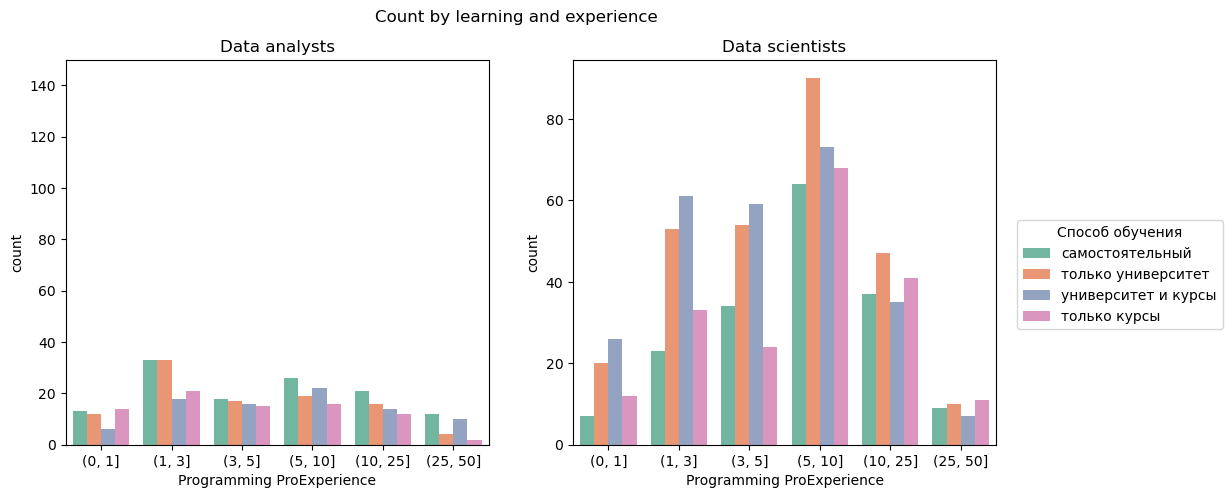

In [344]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(12, 5))
figure.suptitle('Count by learning and experience')

sns.countplot(data = data_spec[data_spec['DevType'].isin(['Data or business analyst'])], x = 'Programming ProExperience', legend = False, palette ='Set2', hue = 'LearnerType',  ax=axes[0]).set_title('Data analysts')
axes[0].set_ylim(0,150)
#слишком низкая робастность групп. добавим к аналитикам остальных дата специалистов без ds
sns.countplot(data = data_spec[(data_spec['DevType'].isin(['Data scientist or machine learning specialist']))], x = 'Programming ProExperience', palette ='Set2', hue = 'LearnerType', ax=axes[1]).set_title('Data scientists')
plt.legend(loc=(1.05,0.3), title= "Способ обучения")
axes[0].set_ylim(0,150)


(0.0, 150.0)

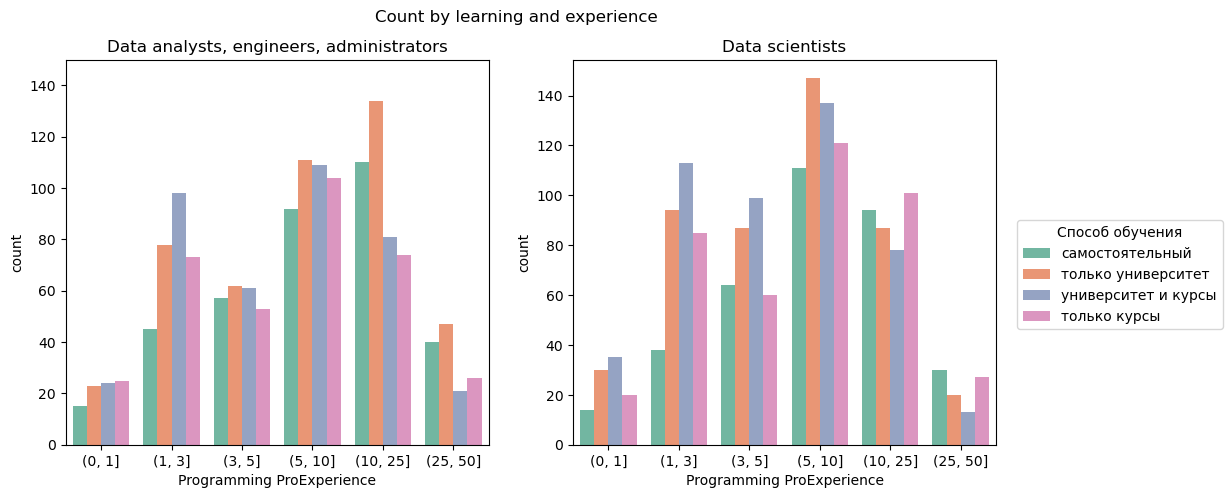

In [345]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(12, 5))
figure.suptitle('Count by learning and experience')

sns.countplot(data = data_spec[data_spec['DevType'].isin(['Data or business analyst', 'Data engineer', 'Database administrator'])], x = 'Programming ProExperience', legend = False, palette ='Set2', hue = 'LearnerType',  ax=axes[0]).set_title('Data analysts, engineers, administrators')
axes[0].set_ylim(0,150)
#слишком низкая робастность групп. добавим к аналитикам остальных дата специалистов без ds
sns.countplot(data = data_spec[(data_spec['Income'] <= 1000000)|(data_spec['DevType'].isin(['Data scientist or machine learning specialist']))], x = 'Programming ProExperience', palette ='Set2', hue = 'LearnerType', ax=axes[1]).set_title('Data scientists')
plt.legend(loc=(1.05,0.3), title= "Способ обучения")
axes[0].set_ylim(0,150)

#в некоторых группах все равно меньше 20 человек

(0.0, 220000.0)

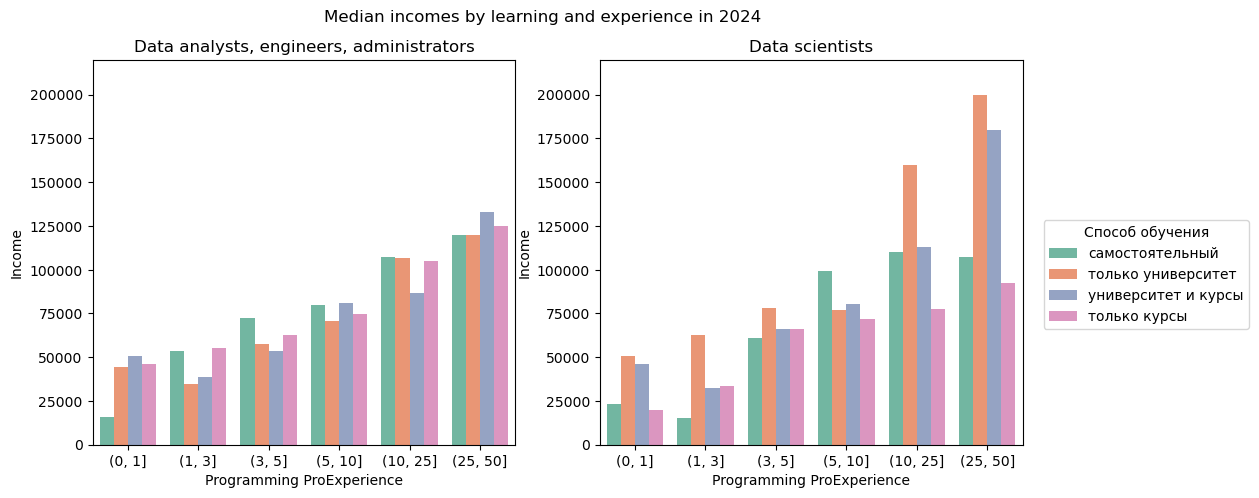

In [346]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(12, 5))
figure.suptitle('Median incomes by learning and experience in 2024')

sns.barplot(data = data_spec[data_spec['DevType'].isin(['Data or business analyst', 'Data engineer', 'Database administrator'])], x = 'Programming ProExperience', legend = False, y = 'Income', palette ='Set2', hue = 'LearnerType',  ax=axes[0], estimator = 'median', errorbar = None).set_title('Data analysts, engineers, administrators')
axes[0].set_ylim(0,220000)

sns.barplot(data = data_spec[(data_spec['DevType'].isin(['Data scientist or machine learning specialist']))], x = 'Programming ProExperience', y = 'Income', palette ='Set2', hue = 'LearnerType', ax=axes[1], estimator = 'median', errorbar = None).set_title('Data scientists')
plt.legend(loc=(1.05,0.3), title= "Способ обучения")
axes[1].set_ylim(0,220000)

Группа "самостоятельный" отстает среди начинающих дата специалистов
Чаще всего доходы дата сайентистов группы "университет и курсы" или "только университет" опережают остальных

Также, отмечаем, что доходы остальных дата специалистов в среднем выравниваются

(0.0, 400000.0)

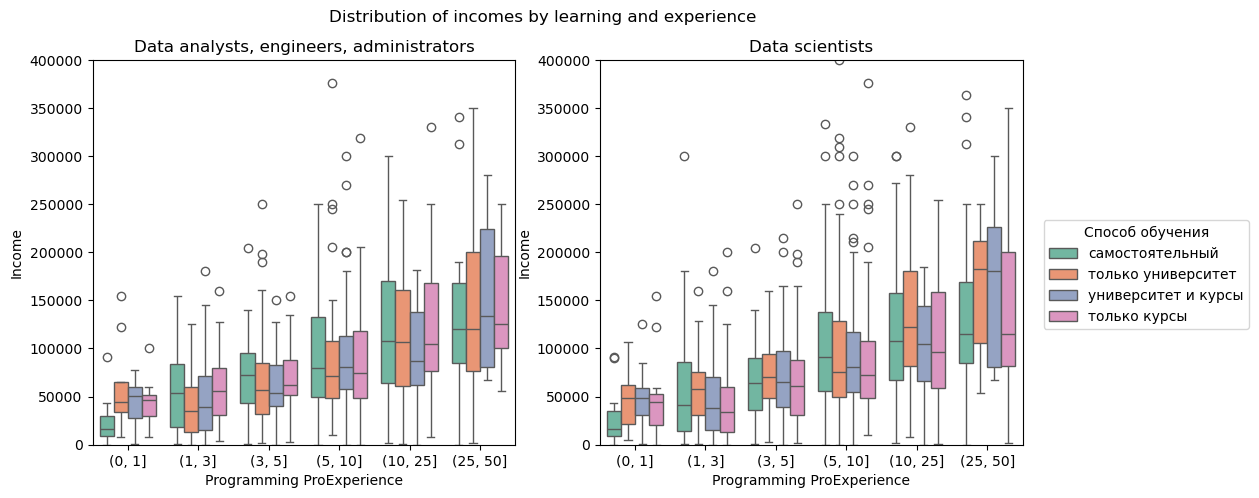

In [348]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(12, 5))
figure.suptitle('Distribution of incomes by learning and experience')

sns.boxplot(data = data_spec[data_spec['DevType'].isin(['Data or business analyst', 'Data engineer', 'Database administrator'])], x = 'Programming ProExperience', legend = False, y = 'Income', palette ='Set2', hue = 'LearnerType',  ax=axes[0]).set_title('Data analysts, engineers, administrators')
axes[0].set_ylim(0,400000)

sns.boxplot(data = data_spec[(data_spec['Income'] <= 1000000)|(data_spec['DevType'].isin(['Data scientist or machine learning specialist']))], x = 'Programming ProExperience', y = 'Income', palette ='Set2', hue = 'LearnerType', ax=axes[1]).set_title('Data scientists')
plt.legend(loc=(1.05,0.3), title= "Способ обучения")
axes[1].set_ylim(0,400000)

Мы видим, что доходы топ data scientists кажутся более зависимыми от образования, в то время как остальные дата специалисты растут в доходах более равномерно с точки зрения различий в бэкграунде 

Распределение доходов среди группы дата специалистов показывает 
1) опыт повышает доходы. 
2) Чем больше опыта тем в среднем менее значимы различия в первичном бэкграунде
3)  Специалисты до 1 года опыта с бэкграундом "только университет" сталкиваются с в среднем меньшим доходом - однако, это скорее всего случайность ввиду выборки меньше 20 человек

Распределение среди дата специалистов показывает:
1) опыт повышает доходы
2) data scientists с доходом выше среднего скорее всего не учились самостоятельно
3) "университет и курсы" опережают остальные группы

  

<a id='3.3'></a>
# 3.3. Изучение динамики доходов

In [352]:
df20 = pd.read_csv('survey_results_public2020.csv')
df21 = pd.read_csv('survey_results_public2021.csv')
df22 = pd.read_csv('survey_results_public2022.csv')
df23 = pd.read_csv('survey_results_public2023.csv')
df24 = pd.read_csv('survey_results_public.csv')
#соберем данные о доходе и опыте за прошлые годы в том же формате что и раньше

prev_years_df = pd.DataFrame()
prev_years_df[['ConvertedCompYearly','YearsCodePro', 'DevType']] = df20[['ConvertedComp', 'YearsCodePro', 'DevType']]  

#ConvertedComp = доход в usd за год, но впоследствии эту ячейку переименуют в ConvertedCompYearly

In [353]:
#создадим указание года в каждом дф что мы добавим в накопительный дата фрейм
prev_years_df['year'] = 2020
df21['year']=2021
#c 22 года появляется LearnCode --> 
df22['year']=2022
df23['year']=2023
df24['year']=2024

df22.drop(df22[df22['LearnCode'].isnull()].index, axis = 0)
df23.drop(df23[df23['LearnCode'].isnull()].index, axis = 0)
df24.drop(df24[df24['LearnCode'].isnull()].index, axis = 0)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,...,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,year
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2024
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,37,27,Developer Experience,NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,C#,C#,C#,Firebase Realtime Da

In [354]:
#Добавим последующие годы

prev_years_df = pd.concat([prev_years_df[['ConvertedCompYearly','YearsCodePro','year', 'DevType']], df21[['ConvertedCompYearly','YearsCodePro','year', 'DevType']]])

#до 22 года не LearnCode LearnCodeOnline не собирались и их полного аналога увы нет. Создаём эти колонки в накопительном дф и собираем в него последующие годы
prev_years_df[['LearnCode','LearnCodeOnline']] = False

prev_years_df = pd.concat([prev_years_df, df22[['ConvertedCompYearly','YearsCodePro','year', 'DevType', 'LearnCode','LearnCodeOnline']]])
prev_years_df = pd.concat([prev_years_df, df23[['ConvertedCompYearly','YearsCodePro','year', 'DevType', 'LearnCode','LearnCodeOnline']]])
prev_years_df = pd.concat([prev_years_df, df24[['ConvertedCompYearly','YearsCodePro','year', 'DevType', 'LearnCode','LearnCodeOnline']]])

In [355]:
'Приведем к тому же формату что и данные df'

#разбиваем данные на корзины по опыту 
prev_years_df['YearsCodePro'] = prev_years_df['YearsCodePro'].replace(to_replace = ['More than 50 years', 'Less than 1 year'], value = [50, 0])
prev_years_df['YearsCodePro'] = prev_years_df['YearsCodePro'].astype('float')

prev_years_df['Programming ProExperience'] = pd.cut(prev_years_df['YearsCodePro'], bins = [0,1,3,5,10,25,50])
prev_years_df['data_specialist'] = prev_years_df['DevType'].isin(['Data or business analyst', 
                             'Data scientist or machine learning specialist',
                             'Data engineer', 'Database administrator'])

#выделяем тех кто учился в университете и на курсах
prev_years_df['has_school'] = prev_years_df['LearnCode'].str.contains("School (i.e., University, College, etc)", regex=False, na=False)

prev_years_df['studied_courses'] = ((prev_years_df['LearnCodeOnline'].str.contains('Written-based Online Courses', regex=False, na=False)) |\
               (prev_years_df['LearnCodeOnline'].str.contains('Video-based Online Courses', regex=False, na=False)) |\
               (prev_years_df['LearnCodeOnline'].str.contains('Certification videos', regex=False, na=False)))

#создаем колонку "способ обучения" включающую 4 варианта обучения 
def learntype(has_school, studied_courses, LearnCode):    
    if has_school is True and studied_courses is True:
        return 'университет и курсы' #в старых версиях было both
    elif has_school is False and studied_courses is True:
        return 'только курсы' #'studied at courses'
    elif has_school is True and studied_courses is False:
        return 'только университет' #studied at college
    elif LearnCode is False:
        return 'нет информации'
    elif has_school is False and studied_courses is False:
        return 'самостоятельный' #neither
        
prev_years_df['LearnerType'] = np.vectorize(learntype)(prev_years_df['has_school'], prev_years_df['studied_courses'], prev_years_df['LearnCode']) 
prev_years_df = prev_years_df.reset_index().rename(columns = {'ConvertedCompYearly': 'Income'})


<Axes: xlabel='YearsCodePro', ylabel='Income'>

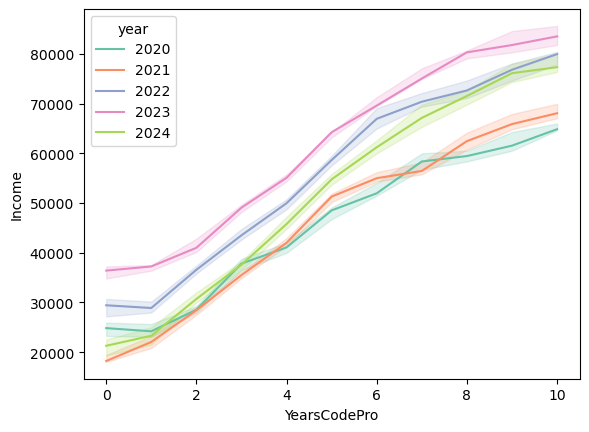

In [356]:

sns.lineplot(data = prev_years_df[(prev_years_df['YearsCodePro'] <= 10)], x = 'YearsCodePro', y = 'Income', hue = 'year', palette = 'Set2', estimator = 'median', errorbar=('ci', 68))
#удивительным образом в 2022 м и 2023 годах специалисты в среднем заявляли большие доходы


<Axes: xlabel='YearsCodePro', ylabel='Income'>

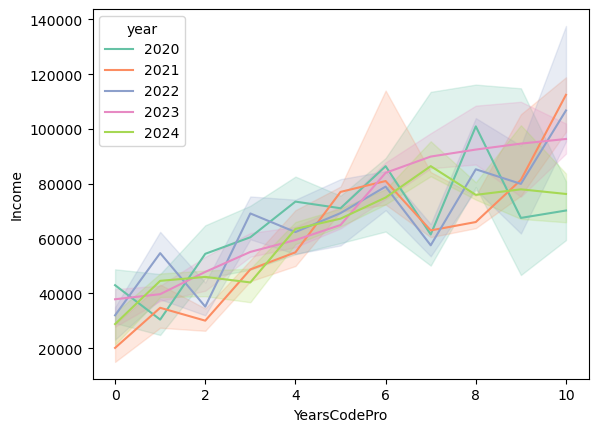

In [357]:

sns.lineplot(data = prev_years_df[(prev_years_df['YearsCodePro'] <= 10) & (prev_years_df['data_specialist'] == True)], x = 'YearsCodePro', y = 'Income', hue = 'year', palette = 'Set2', estimator = 'median', errorbar=('ci', 68))
#специалисты по работе с данными заявляли очень разные доходы

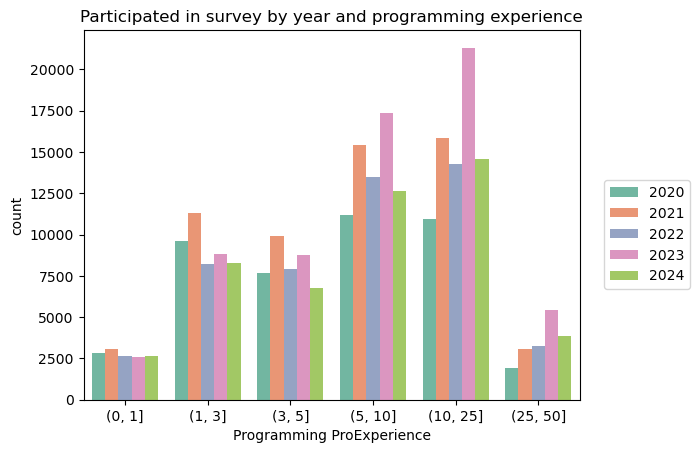

In [358]:

#посмотрим на распределение числа специалистов по опыту и способу обучения - не включая тех о ком нет информации о способе обучения

sns.countplot(data = prev_years_df, x = 'Programming ProExperience',  palette ='Set2', hue = 'year').set_title('Participated in survey by year and programming experience')
plt.legend(loc=(1.05,0.3))


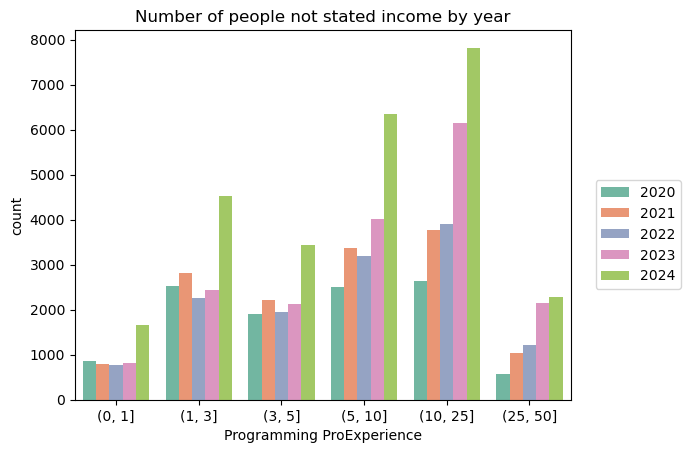

In [359]:
sns.countplot(data = prev_years_df[prev_years_df['Income'].isnull()], x = 'Programming ProExperience',  palette ='Set2', hue = 'year').set_title('Number of people not stated income by year')
plt.legend(loc=(1.05,0.3))
#2024 рекорден по количеству людей не раскрывающих доход. Мы видим почти пропорциональный прирост таковых  в некоторых категориях

In [360]:
not_stated = prev_years_df[prev_years_df['Income'].isnull()].groupby(['year']).count()['index']
not_stated.name = 'income_NA'
stated = prev_years_df.groupby(['year']).count()['index']
stated.name = 'all_responses'
compare = pd.concat([not_stated, stated], join="inner", axis = 1)
compare['%_not_stated_income'] = compare['income_NA'] / compare['all_responses'] * 100
compare
# в 2024 доля принявших участие в опросе и не указавших доход превысило 50% и значительно отклонилось от средней доли по годам

,income_NA,all_responses,%_not_stated_income
year,,,
2020,29705,64461,46.082127
2021,36595,83439,43.858388
2022,35197,73268,48.038707
2023,41165,89184,46.157382
2024,42002,65437,64.186928


In [361]:
not_stated = prev_years_df[prev_years_df['LearnCode'].isnull()].groupby(['year']).count()['index']
not_stated.name = 'LearnCode_NA'
stated = prev_years_df.groupby(['year']).count()['index']
stated.name = 'all_responses'
compare = pd.concat([not_stated, stated], join="inner", axis = 1)
compare['%_not_stated_learning'] = compare['LearnCode_NA'] / compare['all_responses'] * 100
compare
#количество проигнорировавших вопрос о способе обучения тоже выросло

,LearnCode_NA,all_responses,%_not_stated_learning
year,,,
2022,1688,73268,2.303871
2023,1521,89184,1.705463
2024,4949,65437,7.563000


Text(0.5, 1.0, "Specialists' income by year and Experience bracket, usd")

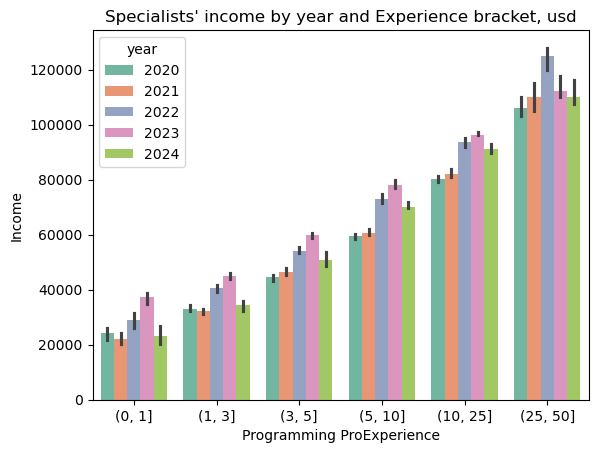

In [362]:
#посмотрим на распределение зарплат по годам и опыту специалиста
sns.barplot(data = prev_years_df, x = 'Programming ProExperience', y = 'Income', estimator = np.median, errorbar='ci', hue = 'year', palette = 'Set2').set_title("Specialists' income by year and Experience bracket, usd")


Отметим
- более высокие чем ожидалось значения в верхних возрастных группах в 2022 году, 
- превышение средних значений 2023 года над аналогами
- отставание 2024 года от тренда на рост доходов
- также мы замечаем что в 2024 году доля людей не раскрывающих доходы значительно увеличилась с 43-46 % в предыдущие годы до более чем 64%

In [364]:
prev_years_df

,index,Income,YearsCodePro,year,DevType,LearnCode,LearnCodeOnline,Programming ProExperience,data_specialist,has_school,studied_courses,LearnerType
0,0,NaN,27.0,2020,"Developer, desktop or enterprise applications;...",False,False,"(25.0, 50.0]",False,False,False,нет информации
1,1,NaN,4.0,2020,"Developer, full-stack;Developer, mobile",False,False,"(3.0, 5.0]",False,False,False,нет информации
2,2,NaN,NaN,2020,NaN,False,False,NaN,False,False,False,нет информации
3,3,NaN,4.0,2020,NaN,False,False,"(3.0, 5.0]",False,False,False,нет информации
4,4,NaN,8.0,2020,NaN,False,False,"(5.0, 10.0]",False,False,False,нет информации
...,...,...,...,...,...,...,...,...,...,...,...,...
375784,65432,NaN,3.0,2024,Blockchain,"On the job training;School (i.e., University, ...",NaN,"(1.0, 3.0]",False,True,False,только университет
375785,65433,NaN,NaN,2024,NaN,NaN,NaN,NaN,False,False,False,самостоятельный
375786,65434,NaN,5.0,2024,"Developer, mobile","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,"(3.0, 5.0]",False,False,False,самостоятельный
375787,65435,NaN,2.0,2024,"Developer, back-end",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,"(1.0, 3.0]",False,False,False,самостоятельный


C:\Users\talek\AppData\Local\Temp\ipykernel_11640\2066225160.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map_compare['data<=5y_exp'] = prev_years_df[(prev_years_df['data_specialist'] == True) & (prev_years_df['LearnerType']!= 'нет информации')][prev_years_df['YearsCodePro']<=5].groupby(['LearnerType']).count()['level_0']/prev_years_df[(prev_years_df['data_specialist'] == True) & (prev_years_df['LearnerType']!= 'нет информации')][prev_years_df['YearsCodePro']<=5].count()['level_0'].sum()*100
C:\Users\talek\AppData\Local\Temp\ipykernel_11640\2066225160.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  heat_map_compare['data<=5y_exp'] = prev_years_df[(prev_years_df['data_specialist'] == True) & (prev_years_df['LearnerType']!= 'нет информации')][prev_years_df['YearsCodePro']<=5].groupby(['LearnerType']).count()['level_0']/prev_years_df[(prev_years_df['data_specialist'] == True) & (prev_years_df['LearnerType']!= 

<Axes: ylabel='LearnerType'>

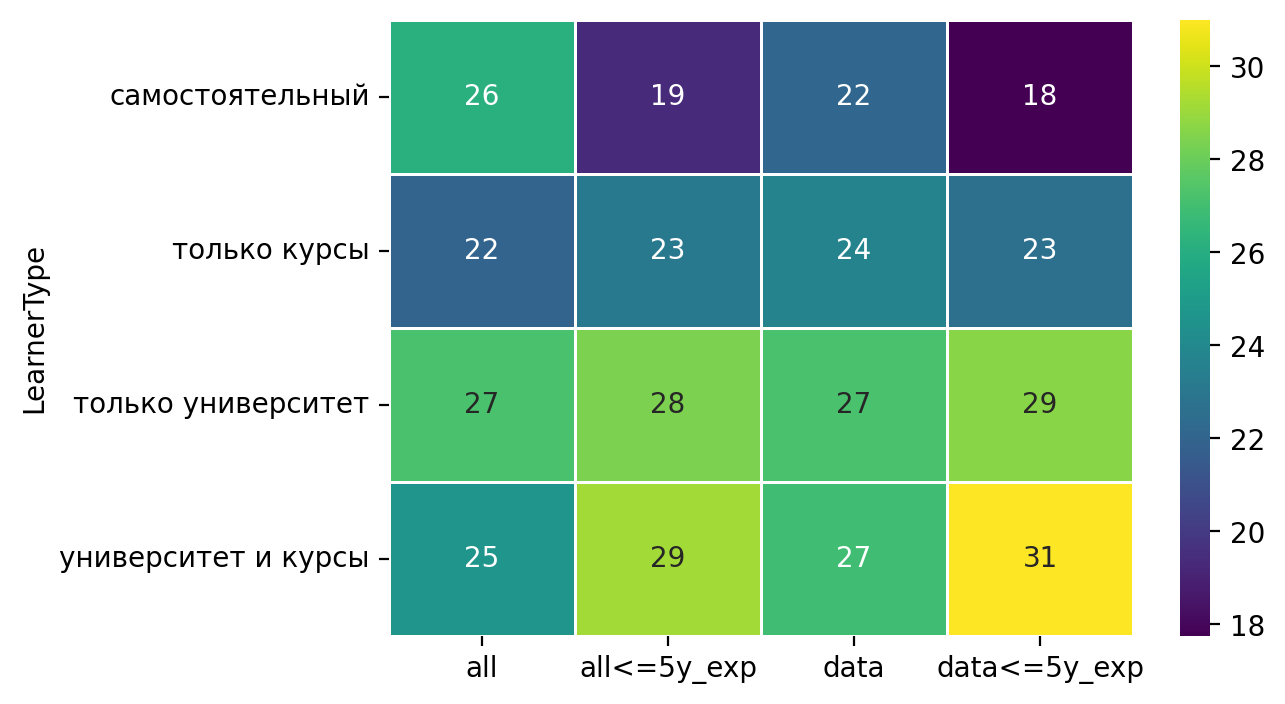

In [365]:
#Посмотрим на предпочитаемые способы обучения
heat_map_compare = pd.DataFrame()
prev_years_df = prev_years_df.reset_index()
heat_map_compare['all'] = prev_years_df[(prev_years_df['LearnerType'] != 'нет информации')].groupby(['LearnerType']).count()['level_0']/prev_years_df[(prev_years_df['LearnerType'] != 'нет информации')].groupby(['LearnerType']).count()['level_0'].sum()*100
heat_map_compare['all<=5y_exp'] = prev_years_df[(prev_years_df['YearsCodePro'] <=5) & (prev_years_df['LearnerType'] != 'нет информации')].groupby(['LearnerType']).count()['level_0']/prev_years_df[(prev_years_df['YearsCodePro'] <=5) & (prev_years_df['LearnerType'] != 'нет информации')].count()['level_0'].sum()*100
heat_map_compare['data'] = prev_years_df[(prev_years_df['data_specialist'] == True) & (prev_years_df['LearnerType'] != 'нет информации')].groupby(['LearnerType']).count()['level_0']/prev_years_df[(prev_years_df['data_specialist'] == True) & (prev_years_df['LearnerType'] != 'нет информации')].count()['level_0'].sum()*100
heat_map_compare['data<=5y_exp'] = prev_years_df[(prev_years_df['data_specialist'] == True) & (prev_years_df['LearnerType']!= 'нет информации')][prev_years_df['YearsCodePro']<=5].groupby(['LearnerType']).count()['level_0']/prev_years_df[(prev_years_df['data_specialist'] == True) & (prev_years_df['LearnerType']!= 'нет информации')][prev_years_df['YearsCodePro']<=5].count()['level_0'].sum()*100



plt.figure(figsize = (6,4),dpi = 200) 
sns.heatmap(data=heat_map_compare, linewidth = 0.5, annot = True, cmap = 'viridis')


дата специалисты, все специалисты до 5 лет опыта и дата специалисты до 5 лет опыта чаще учатся в университете и на курсах чем самостоятельно. 
В отличие от генеральной совокупности

In [367]:
prev_years_df['LearnerType'].value_counts()

LearnerType
нет информации         147900
только университет      61959
самостоятельный         59599
университет и курсы     56226
только курсы            50105
Name: count, dtype: int64

In [368]:
'уберем крупных outliers среди людей без указанного опыта или с небольшим опытом и тех кто не указал способ обучения'
no_relevance = prev_years_df[(prev_years_df['Income']>100000) & (prev_years_df['YearsCodePro'] <= 1) & (prev_years_df['LearnerType'] == 'нет информации')]

prev_years_df['Income'] = prev_years_df['Income'].drop(no_relevance.index, axis=0) 

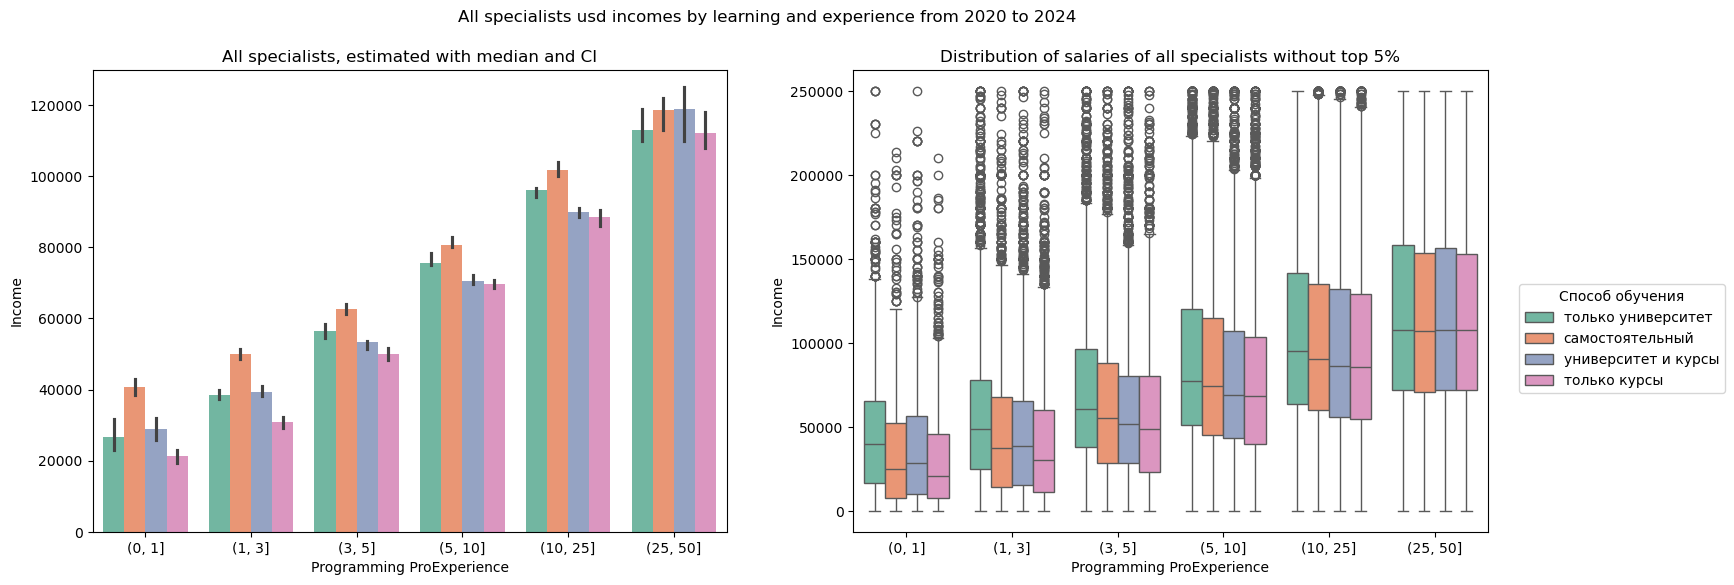

In [369]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(18, 6))
figure.suptitle('All specialists usd incomes by learning and experience from 2020 to 2024')


axes[0].set_title('All specialists, estimated with median and CI')
sns.barplot(data = prev_years_df[(~prev_years_df['LearnerType'].isin(['нет информации']))], x = 'Programming ProExperience', y = 'Income', legend = False, estimator = np.median, errorbar='ci', hue = 'LearnerType', palette = 'Set2', ax=axes[0])
axes[0].set_ylim(0,130000)

axes[1].set_title('Distribution of salaries of all specialists without top 5%')
sns.boxplot(data =prev_years_df[(~prev_years_df['LearnerType'].isin(['нет информации'])) & (prev_years_df['Income'] <= prev_years_df['Income'].quantile(0.95))], x = 'Programming ProExperience', y = 'Income', hue='LearnerType', palette = 'Set2', ax=axes[1])\

plt.legend(loc=(1.05,0.3), title= "Способ обучения")

Среди всех специалистов мы видим, что у самых опытных происходит выравнивание доходов,
в то время как ранее доходы людей предпочитающих способ обучения "самостоятельный" несколько превышали таковые у других групп.

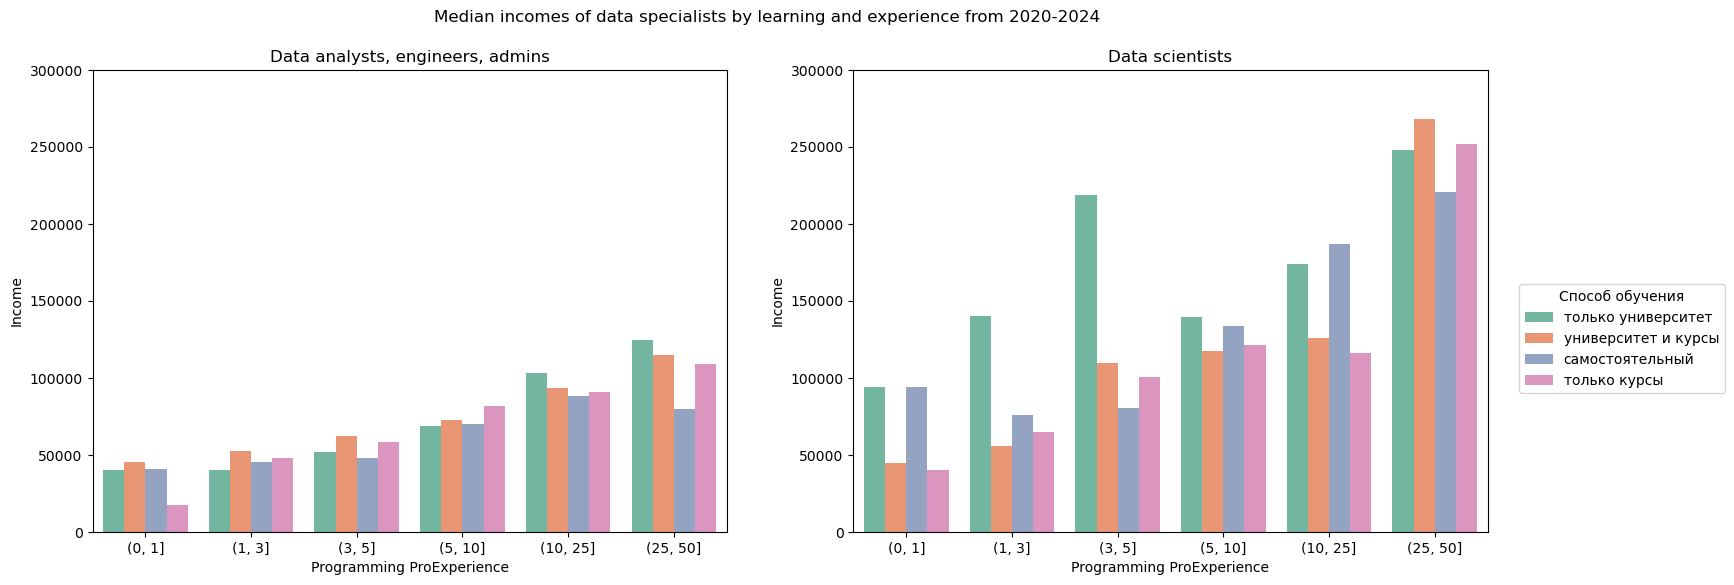

In [371]:

figure, axes = plt.subplots(1, 2, sharex=True, figsize=(18, 6))
figure.suptitle('Median incomes of data specialists by learning and experience from 2020-2024')

axes[0].set_title('Data analysts, engineers, admins')
sns.barplot(data =prev_years_df[(prev_years_df['DevType'].isin(['Data or business analyst', 'Data engineer', 'Database administrator']))&(~prev_years_df['LearnerType'].isin(['нет информации'])) & (prev_years_df['data_specialist'] == True)], x = 'Programming ProExperience', y = 'Income', hue='LearnerType', legend = False, palette = 'Set2', ax=axes[0], estimator = 'median', errorbar=None)
axes[0].set_ylim(0,300000)

axes[1].set_title('Data scientists')
sns.barplot(data =prev_years_df[(prev_years_df['DevType'].isin(['Data scientist or machine learning specialist']))&(~prev_years_df['LearnerType'].isin(['нет информации'])) & (prev_years_df['data_specialist'] == True)], x = 'Programming ProExperience', y = 'Income', hue='LearnerType', palette = 'Set2', ax=axes[1], estimator = 'mean', errorbar=None)
axes[1].set_ylim(0,300000)

plt.legend(loc=(1.05,0.3), title= "Способ обучения")

  Среди находок изучения динамики доходов можем отметить:
- тренд на выравнивание среднего дохода относительно опыта у всех специалистов кроме data scientists
- относительное отставание средних доходов начинающих дата специалистов со способом обучения "только курсы"
- доходы примерно выравниваются относительно опыта, однако у data scientiests доходы группы "только университет" растут быстрее всего в начале карьеры. в то время как впоследствии лидеры нескольк меняются

In [373]:
#Создадим похожий df для реализации некоторых возможностей дашборда. dash_df 

In [374]:
df20 = pd.read_csv('survey_results_public2020.csv')
df21 = pd.read_csv('survey_results_public2021.csv')
df22 = pd.read_csv('survey_results_public2022.csv')
df23 = pd.read_csv('survey_results_public2023.csv')
df24 = pd.read_csv('survey_results_public.csv')

df20 = df20[['ConvertedComp', 'YearsCodePro', 'DevType']].rename(columns = {'ConvertedComp': 'ConvertedCompYearly_20', 'YearsCodePro': 'YearsCodePro_20', 'DevType':'DevType_20'})
df21 = df21[['ConvertedCompYearly', 'YearsCodePro', 'DevType']].rename(columns = {'ConvertedCompYearly': 'ConvertedCompYearly_21', 'YearsCodePro': 'YearsCodePro_21', 'DevType':'DevType_21'})
df22 = df22[['ConvertedCompYearly','YearsCodePro', 'DevType', 'LearnCode','LearnCodeOnline']].rename(columns = {'ConvertedCompYearly': 'ConvertedCompYearly_22', 'YearsCodePro': 'YearsCodePro_22', 'DevType':'DevType_22', 'LearnCode': 'LearnCode_22' ,'LearnCodeOnline':'LearnCodeOnline_22'})
df23 = df23[['ConvertedCompYearly','YearsCodePro', 'DevType', 'LearnCode','LearnCodeOnline']].rename(columns = {'ConvertedCompYearly': 'ConvertedCompYearly_23', 'YearsCodePro': 'YearsCodePro_23', 'DevType':'DevType_23', 'LearnCode': 'LearnCode_23' ,'LearnCodeOnline':'LearnCodeOnline_23'})
df24 = df24[['ConvertedCompYearly','YearsCodePro','DevType', 'LearnCode','LearnCodeOnline']].rename(columns = {'ConvertedCompYearly': 'ConvertedCompYearly_24', 'YearsCodePro': 'YearsCodePro_24', 'DevType':'DevType_24', 'LearnCode': 'LearnCode_24' ,'LearnCodeOnline':'LearnCodeOnline_24'})

dash_df = pd.DataFrame()
dash_df = pd.concat([df20, df21], axis=1, join='outer')
dash_df = pd.concat([dash_df, df22], axis=1, join='outer')
dash_df = pd.concat([dash_df, df23], axis=1, join='outer')
dash_df = pd.concat([dash_df, df24], axis=1, join='outer')


In [375]:
#сохраним результаты

In [376]:
df.to_csv('df24.csv', sep=',', index=False, encoding='utf-8')
prev_years_df.to_csv('df.csv', sep=',', index=False, encoding='utf-8')
dash_df.to_csv('dash_df.csv', sep=',', index=False, encoding='utf-8') 

<a id='results'></a>
# Результаты
В результате проведенного исследования мы обнаружили, что среди специалистов без разделения по специальностям изменились лидеры по медианным доходам. 

Если взять все доступные годы и выделить группы по способу обучения программированию: "только университет", "только курсы", "университет и курсы" и "самостоятельно", то мы увидим, что до 2024 года лидерами были "самостоятельные", а теперь ими стали "только университет" и "университет и курсы" - в зависимости от опыта респондентов.

Похожим образом - не в пользу обучающихся самостоятельно - изменяются предпочтения по способу обучения.

Также, в 2024 году выросла доля не указавших доходыс 43-46 % в 2022-2023 годах до 64% в 2024-м
В вопросе о способе обучения доля не указавших способ обучения выросла 1,7-2,3 % до 7,5% соответственно, в результате произошло отставание 2024 года от тренда на рост доходов.

Более подробно.

### На усредненных данных с 2020 по 2024 год без разделения по специальности:
1) Опыт работы в среднем имеет большее влияние на доходы чем способ получения навыков для всех исследованных групп
2) Дата специалисты, все специалисты до 5 лет опыта и дата специалисты до 5 лет опыта на 12 - 16% чаще имеют за плечами и университет и курсы чем учатся только самостоятельно.
3) Если взять всех специалистов, то самостоятельная учеба встречается на 1% чаще чем вариант "университет и курсы".
4) Лидерами по доходам в каждой группе являлись учившиеся самостоятельно

### в 2024 году без разделения по специальности: 
1) Обе группы специалистов до 5 лет опыта чаще заканчивали университет и курсы чем их более опытные коллеги. Доля обучающихся самостоятельно у обеих групп на 6% меньше чем при отсутствии фильтрации по опыту.
2) Около 30% исследуемых заявили что зарабатывают свыше 100 k usd
3) Обучавшиеся в университете и как в университете так и на курсах в среднем опережают по доходам респондентов с другими по способами обучения.
4) Разница между максимальным и минимальным значением дохода в одинаковых по опыту группах среди всех специалистов состаляет от 20 (более опытные специалисты) до 63% (специалисты без опыта) и составляет от 10 до 20 k usd в зависимости от способа обучения.
5) Учившиеся самостоятельно уже не являются лидерами по средним доходам



### Распределение доходов дата специалистов с 2020 по 2024 год показывает отличные паттерны от такового за 2024:
1) Начинающие дата специалисты со способом обучения "только курсы" сталкиваются с меньшими доходами до 1 года опыта.
2) Среди data scientists доходы подгруппы "только университет" являются самыми высокими в пределах своего интервала по опыту.
3) доходы Data scientists не выравниваются и группа учившихся самостоятельно отстает по средним доходам
4) доходы остальных дата специалистов выравниваются, при этом явный лидер не так ярко различим
   
### Распределение доходов среди группы дата специалистов 2024 года показывает: 
1) даса сайентисты с доходом выше среднего скорее всего не учились самостоятельно, а группы включающие университет обычное опережают остальных по доходам
3) Для дата специалистов в целом - чем больше опыта тем в среднем менее значимы различия в первичном бэкграунде, доходы снова выравниваются
4) Доходы дата сайентистов снова не выравниваются
5) Специалисты от 0 до 5 лет года опыта с бэкграундом "самостоятельный" сталкиваются с меньшими медианными доходами.

   
